## Vaccine using Prediction

## Import Dependencies

In [3]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve, roc_auc_score

# Set the option to display all columns
pd.set_option('display.max_columns', None)

sns.set()


## Load data set

In [4]:
data=pd.read_csv(r"C:\Users\AK\Desktop\file\vaccine.csv")
data.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
data.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [6]:
data.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [7]:
data.shape

(26707, 34)

In [8]:
data.isnull().sum()


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [36]:
 # Explore object columns
data[[c for c in data.columns if data[c].dtype =='object']].describe()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
count,26707,25300,26707,26707,22284,25299,24665,25244,26707
unique,5,4,4,2,3,2,2,3,3
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
freq,6843,10097,21222,15858,12777,13555,18736,13560,11645


In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
unique_id,26707.0,13353.000000,7709.791156,0.0,6676.50000,13353.00000,20029.500000,26706.0
h1n1_worry,26707.0,1.618486,0.908741,0.0,1.00000,2.00000,2.000000,3.0
h1n1_awareness,26707.0,1.262532,0.616805,0.0,1.00000,1.00000,2.000000,2.0
antiviral_medication,26707.0,0.048844,0.215258,0.0,0.00000,0.00000,0.000000,1.0
contact_avoidance,26707.0,0.725612,0.444473,0.0,0.00000,1.00000,1.000000,1.0
bought_face_mask,26707.0,0.068982,0.253339,0.0,0.00000,0.00000,0.000000,1.0
wash_hands_frequently,26707.0,0.825614,0.379150,0.0,1.00000,1.00000,1.000000,1.0
avoid_large_gatherings,26707.0,0.358640,0.478828,0.0,0.00000,0.00000,1.000000,1.0
reduced_outside_home_cont,26707.0,0.337315,0.472076,0.0,0.00000,0.00000,1.000000,1.0
avoid_touch_face,26707.0,0.677264,0.466410,0.0,0.00000,1.00000,1.000000,1.0


In [4]:
 display(data['dr_recc_h1n1_vacc'].unique(), data['dr_recc_seasonal_vacc'].unique())
# 0=no, 1=yes

array([ 0., nan,  1.])

array([ 0., nan,  1.])

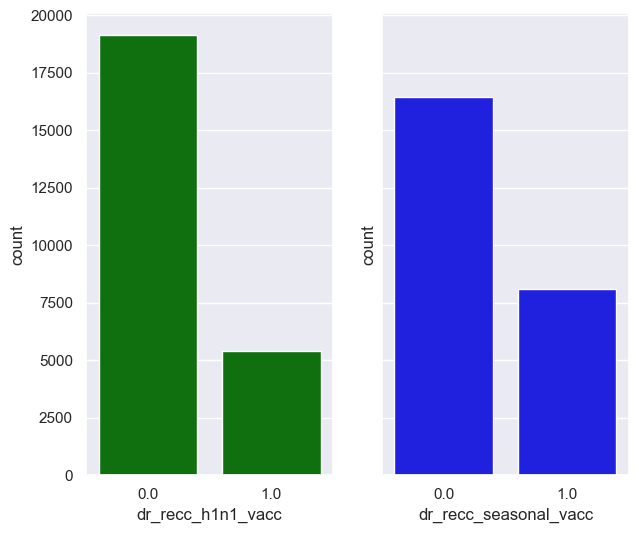

In [7]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = data, color = 'green', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = data, color = 'blue', ax=ax[1])
plt.show()

In [9]:
# filling 2160 missing values by mode
data['dr_recc_h1n1_vacc'].fillna(data['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
data['dr_recc_seasonal_vacc'].fillna(data['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [10]:
data['h1n1_awareness'].unique()
# 0=No knowledge, 1=little knowledge, 2=good knowledge

array([ 0.,  2.,  1., nan])

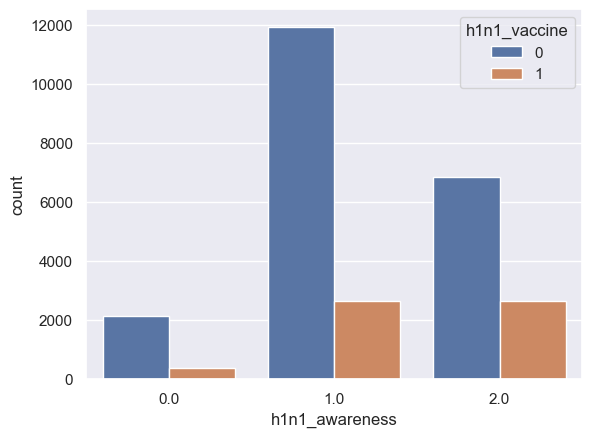

In [11]:
sns.countplot(x = 'h1n1_awareness', data = data, hue = 'h1n1_vaccine')
plt.show()

In [12]:
# Filling 192 missing values by mode
data['h1n1_awareness'].fillna(data['h1n1_awareness'].mode()[0], inplace = True)

In [13]:
data['h1n1_worry'].unique()
# 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried

array([ 1.,  3.,  2.,  0., nan])

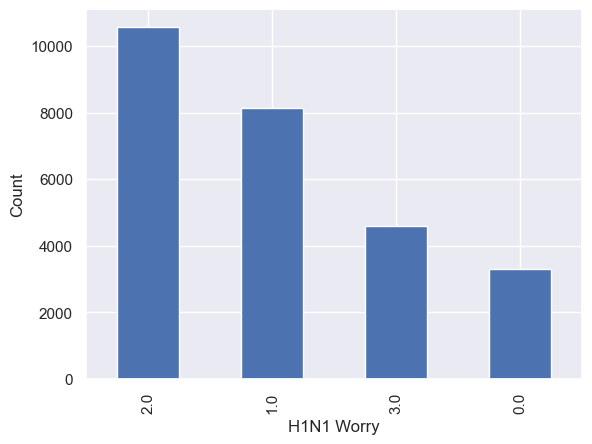

In [14]:
data['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [16]:
# Filling 92 missing values by mode
data['h1n1_worry'].fillna(data['h1n1_worry'].mode()[0], inplace = True)

In [25]:
data['antiviral_medication'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [26]:
data['antiviral_medication'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

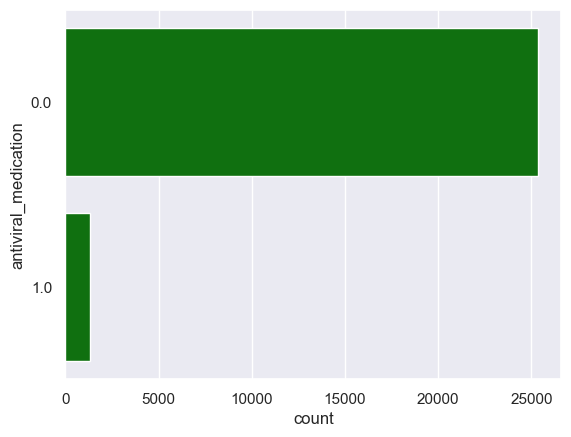

In [27]:
sns.countplot(y = 'antiviral_medication', data = data, color = 'green')
plt.show()

In [30]:
display(data['antiviral_medication'].mode())
# missing 71 missing values by mode
data['antiviral_medication'].fillna(data['antiviral_medication'].mode()[0], inplace = True)

0    0.0
Name: antiviral_medication, dtype: float64

In [32]:
data['contact_avoidance'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

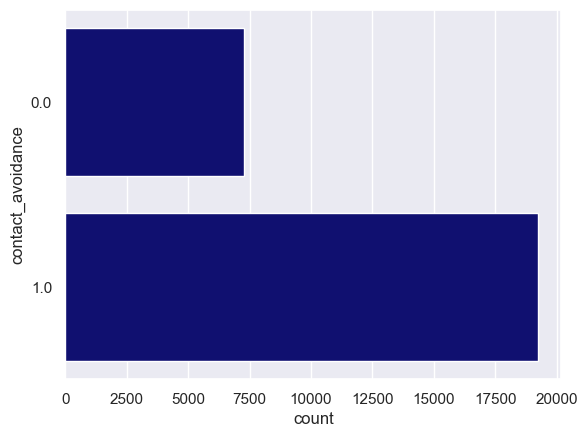

In [34]:
 sns.countplot(y = 'contact_avoidance', data = data, color = 'navy')
plt.show()

In [35]:
# filling 208 missing values by mode
data['contact_avoidance'].fillna(data['contact_avoidance'].mode()[0], inplace = True)

In [37]:
data['bought_face_mask'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

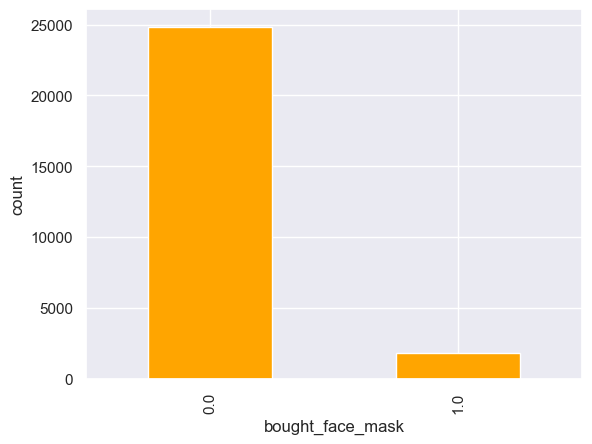

In [39]:
data['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [41]:
# filling 19 missing values by mode
data['bought_face_mask'].fillna(data['bought_face_mask'].mode()[0], inplace = True)

In [42]:
data['wash_hands_frequently'].unique()
# 0-Washes hands frequently, 1=uses hand sanitizer -

array([ 0.,  1., nan])

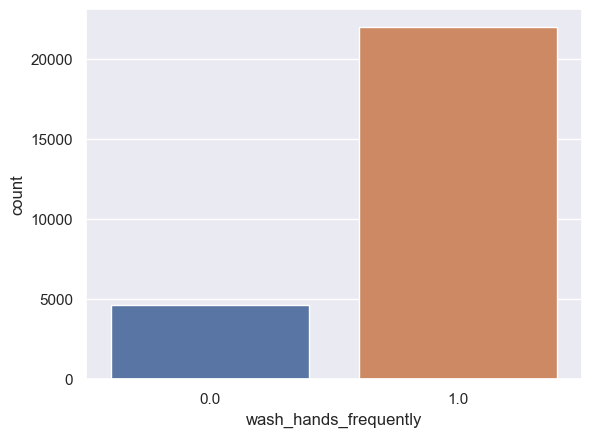

In [46]:
sns.countplot(x = 'wash_hands_frequently', data = data)
plt.show()

In [47]:
# filling 42 missing values by mode
data['wash_hands_frequently'].fillna(data['wash_hands_frequently'].mode()[0], inplace = True)

In [115]:
data['avoid_large_gatherings'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [118]:
data['avoid_large_gatherings'].value_counts()

avoid_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64

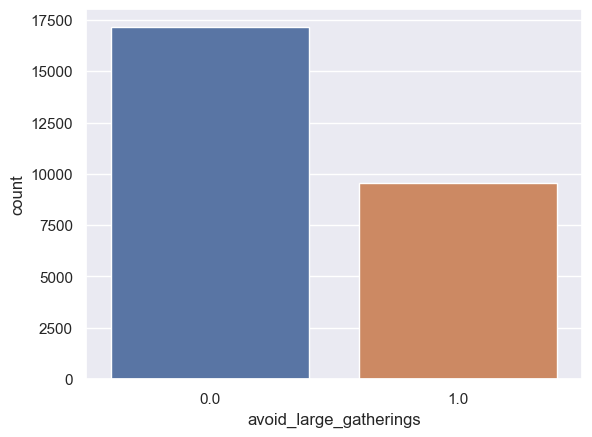

In [119]:
sns.countplot(x = 'avoid_large_gatherings', data = data)
plt.show()

In [120]:
# filling 87 missing values by mode
data['avoid_large_gatherings'].fillna(data['avoid_large_gatherings'].mode()[0], inplace = True)

In [50]:
data['reduced_outside_home_cont'].unique()
# 0=no, 1=yes

array([ 1.,  0., nan])

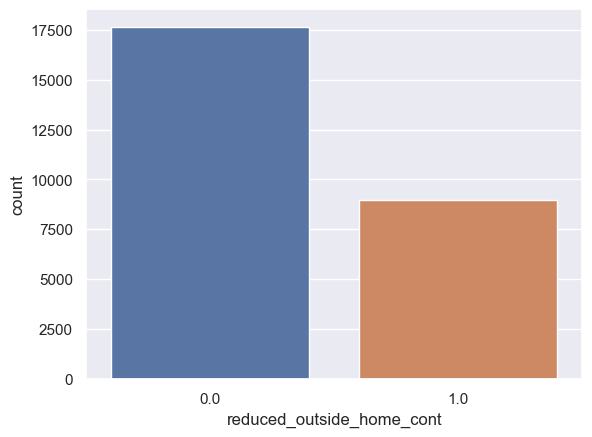

In [51]:
sns.countplot(x = 'reduced_outside_home_cont', data = data)
plt.show()

In [52]:
# filling 82 missing values by mode
data['reduced_outside_home_cont'].fillna(data['reduced_outside_home_cont'].mode()[0], inplace = True)

In [54]:
data['avoid_touch_face'].unique()
# 0=no, 1=yes

array([ 1.,  0., nan])

In [55]:
# filling 128 missing values by mode
data['avoid_touch_face'].fillna(data['avoid_touch_face'].mode()[0], inplace = True)

In [ ]:
display(data['dr_recc_h1n1_vacc'].unique(), data['dr_recc_seasonal_vacc'].unique())
# 0=no, 1=yes

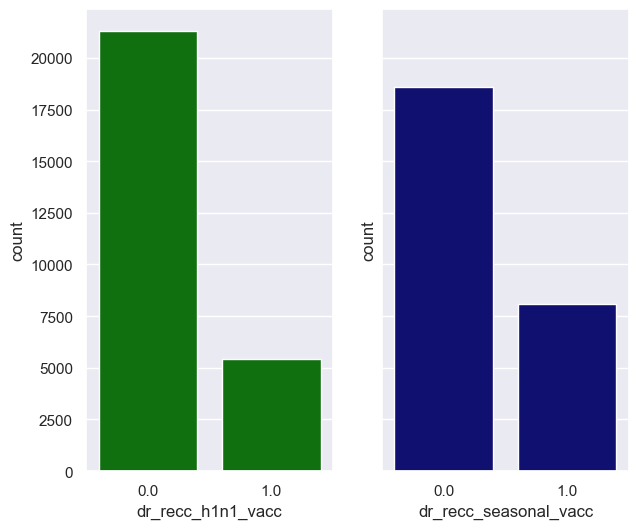

In [57]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = data, color = 'green', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = data, color = 'navy', ax=ax[1])
plt.show()

In [58]:
# filling 2160 missing values by mode
data['dr_recc_h1n1_vacc'].fillna(data['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
data['dr_recc_seasonal_vacc'].fillna(data['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [59]:
data['chronic_medic_condition'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [60]:
data['chronic_medic_condition'].value_counts()

chronic_medic_condition
0.0    18446
1.0     7290
Name: count, dtype: int64

In [61]:
# filling 971 missing values by mode
data['chronic_medic_condition'].fillna(data['chronic_medic_condition'].mode()[0], inplace = True)

In [62]:
data['cont_child_undr_6_mnths'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [63]:
data['cont_child_undr_6_mnths'].value_counts()

cont_child_undr_6_mnths
0.0    23749
1.0     2138
Name: count, dtype: int64

In [64]:
# filling 820 missing values by mode
data['cont_child_undr_6_mnths'].fillna(data['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [68]:
data['is_health_worker'].unique()
# 0=no, 1=yes

array([ 0.,  1., nan])

In [67]:
data['is_health_worker'].value_counts()

is_health_worker
0.0    23004
1.0     2899
Name: count, dtype: int64

In [69]:
# filling 804 missing values by mode
data['is_health_worker'].fillna(data['is_health_worker'].mode()[0], inplace = True)

In [70]:
data['has_health_insur'].unique()
# 0=no, 1=yes

array([ 1., nan,  0.])

<Axes: ylabel='has_health_insur'>

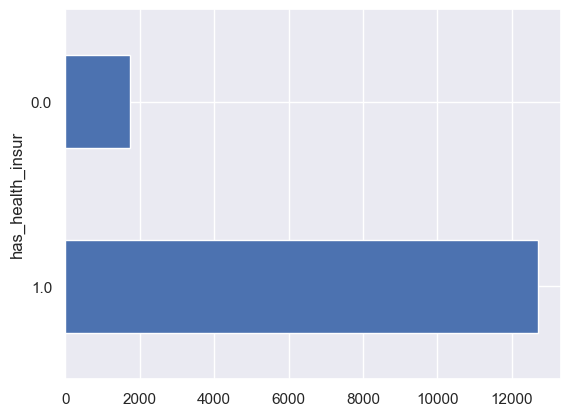

In [72]:
data['has_health_insur'].value_counts().plot(kind = 'barh')

As no of missing values is 12274 which is almost equal to no of persons who have health insurance. Therefore, it is not a good option to replace missing values by mode as there is no surity whether they have insurance. Hence, putting them in another category named '2.0' which means 'data unknown'.

In [122]:
data['has_health_insur'].fillna(2.0, inplace = True)

<Axes: ylabel='has_health_insur'>

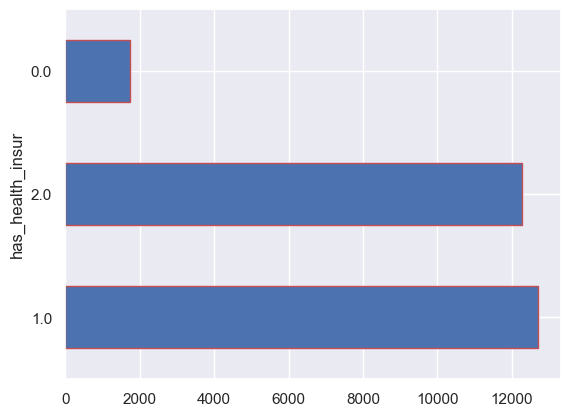

In [123]:
data['has_health_insur'].value_counts().plot(kind = 'barh', color = 'b', edgecolor = 'r')

In [74]:
display(data['is_h1n1_vacc_effective'].unique(), data['is_seas_vacc_effective'].unique())
# 1=Thinks not effective at all, 2=Thinks it is not very effective, 3=Doesn't know if it is effective or not, 
# 4=Thinks it is somewhat effective, 5=Thinks it is highly effective

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

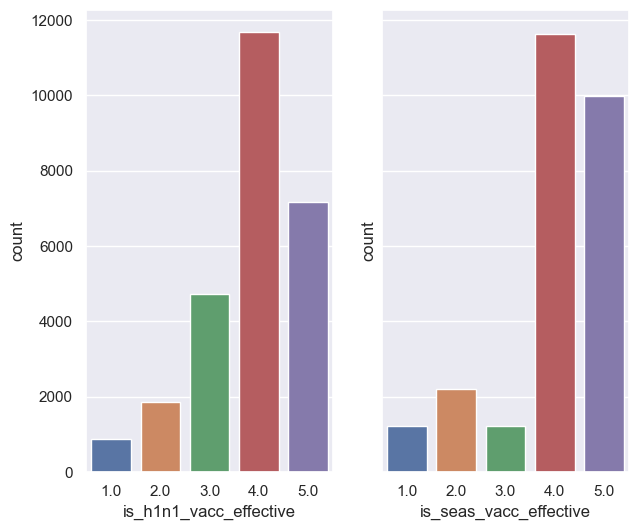

In [80]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'is_h1n1_vacc_effective', data = data,ax=ax[0])
sns.countplot(x = 'is_seas_vacc_effective', data = data,ax=ax[1])
plt.show()

In [81]:
# filling 391 and 462 missing values respectively by mode
data['is_h1n1_vacc_effective'].fillna(data['is_h1n1_vacc_effective'].mode()[0], inplace = True)
data['is_seas_vacc_effective'].fillna(data['is_seas_vacc_effective'].mode()[0], inplace = True)

In [82]:
display(data['is_h1n1_risky'].unique(), data['is_seas_risky'].unique())
# 1=Thinks it is not very low risk, 2=Thinks it is somewhat low risk, 3=don’t know if it is risky or not, 
# 4=Thinks it is a somewhat high risk, 5=Thinks it is very highly risky

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

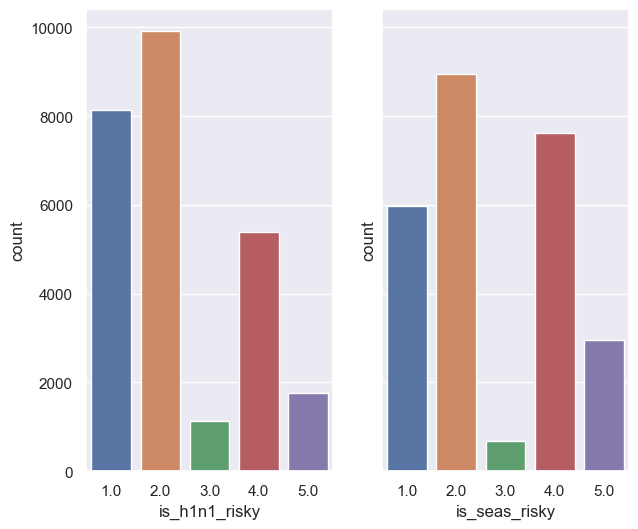

In [83]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'is_h1n1_risky', data = data,ax=ax[0])
sns.countplot(x = 'is_seas_risky', data = data,ax=ax[1])
plt.show()

In [84]:
# filling 388 and 514 missing values respectively by mode
data['is_h1n1_risky'].fillna(data['is_h1n1_risky'].mode()[0], inplace = True)
data['is_seas_risky'].fillna(data['is_seas_risky'].mode()[0], inplace = True)

In [85]:
display(data['sick_from_h1n1_vacc'].unique(), data['sick_from_seas_vacc'].unique())
# 1=Respondent not worried at all, 2=Respondent is not very worried, 3=Doesn't know, 4=Respondent is somewhat worried, 
# 5Respondent is very worried

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

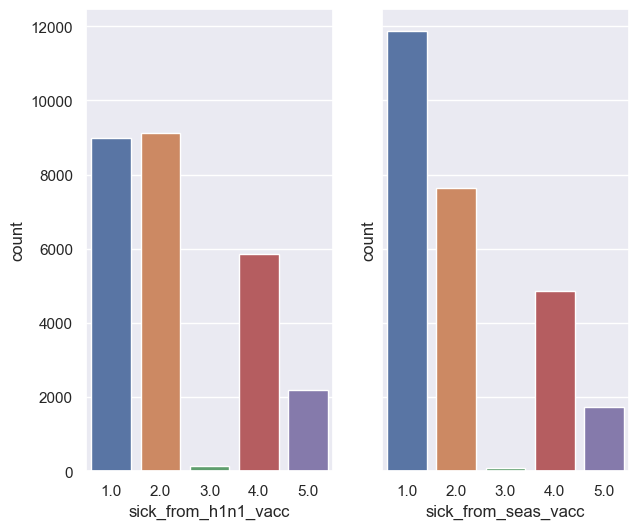

In [86]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'sick_from_h1n1_vacc', data = data,ax=ax[0])
sns.countplot(x = 'sick_from_seas_vacc', data = data,ax=ax[1])
plt.show()

In [87]:
# filling 395 and 537 missing values respectively by mode
data['sick_from_h1n1_vacc'].fillna(data['sick_from_h1n1_vacc'].mode()[0], inplace = True)
data['sick_from_seas_vacc'].fillna(data['sick_from_seas_vacc'].mode()[0], inplace = True)

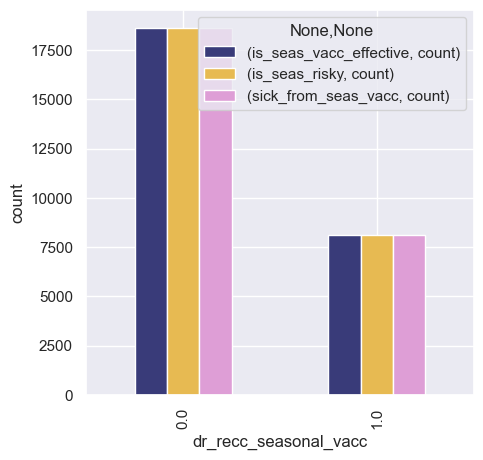

In [88]:
data.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

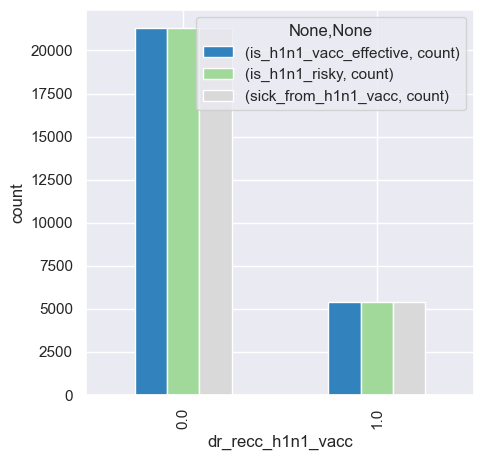

In [89]:
data.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [91]:
data['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [92]:
data['qualification'].value_counts()

qualification
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [93]:
# filling 1407 missing values by mode
data['qualification'].fillna(data['qualification'].mode()[0], inplace = True)

<Axes: xlabel='sex'>

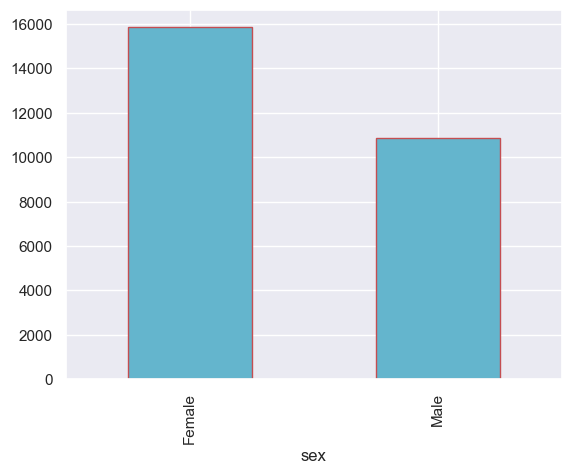

In [94]:
data['sex'].value_counts().plot(kind = 'bar', color = 'c', edgecolor = 'r')
# no nan values

In [95]:
data['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

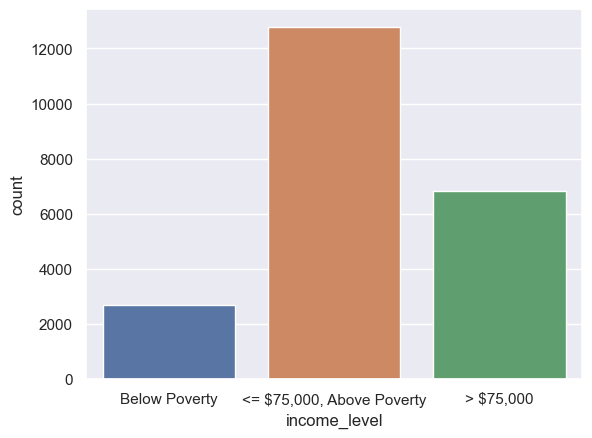

In [96]:
sns.countplot(x = 'income_level', data = data)
plt.show()

In [97]:
data['income_level'].fillna('Unknown', inplace = True)

In [98]:
data['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [99]:
data['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [101]:
# filling 1408 missing values by mode
data['marital_status'].fillna(data['marital_status'].mode()[0], inplace = True)

In [102]:
data['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

<Axes: xlabel='housing_status'>

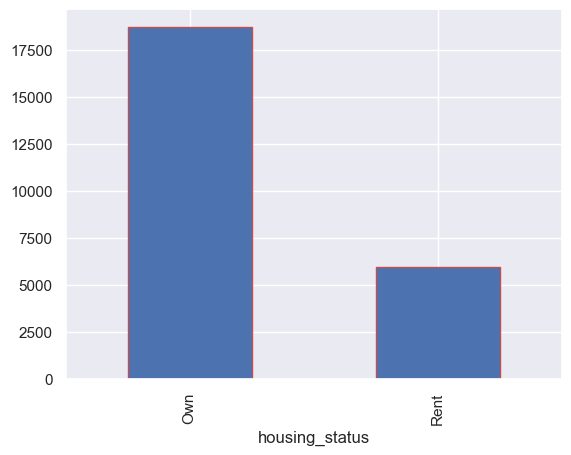

In [103]:
data['housing_status'].value_counts().plot(kind = 'bar', color = 'b', edgecolor = 'r')

In [104]:
# filling 2402 missing values by mode
data['housing_status'].fillna(data['housing_status'].mode()[0], inplace = True)

In [105]:
data['employment'].value_counts()

employment
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

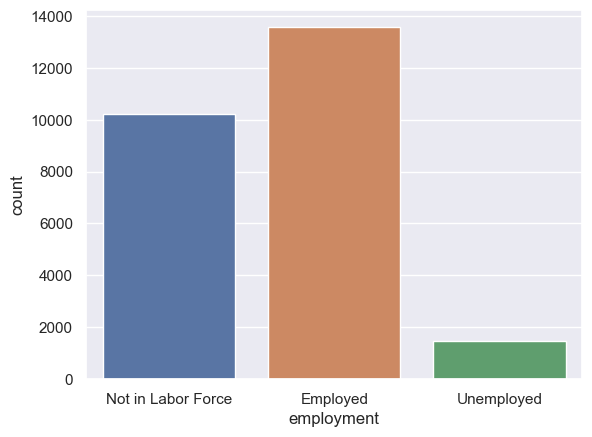

In [106]:
 
sns.countplot(x = 'employment', data = data)
plt.show()

In [107]:
# filling 1463 missing values by mode
data['employment'].fillna(data['employment'].mode()[0], inplace = True)

In [108]:
display(data['no_of_adults'].unique(), data['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

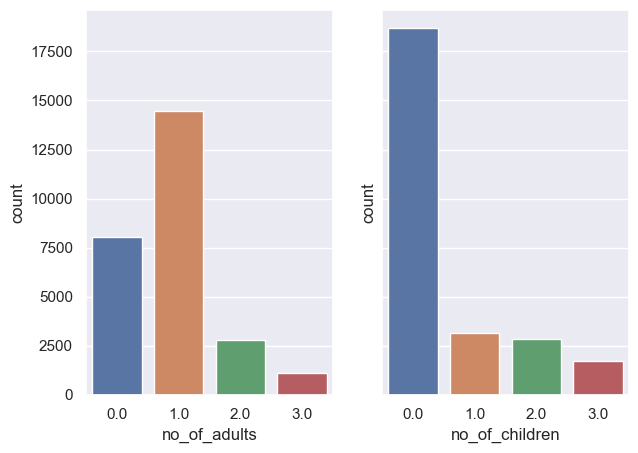

In [109]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data=data, ax = ax[0])
sns.countplot( x = 'no_of_children', data = data, ax = ax[1])
plt.show()


In [111]:
# filling 249 nan values by mode
data['no_of_adults'].fillna(data['no_of_adults'].mode()[0], inplace = True)
data['no_of_children'].fillna(data['no_of_children'].mode()[0], inplace = True)

In [112]:
 data['age_bracket'].value_counts()

age_bracket
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [124]:
data.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [10]:
data1 = data.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
data1.dtypes.value_counts()

object    33
int64      1
Name: count, dtype: int64

In [11]:
data_dummy = pd.get_dummies(data1,  drop_first = True)
data_dummy.head()

,unique_id,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_worry_nan,h1n1_awareness_1.0,h1n1_awareness_2.0,h1n1_awareness_nan,antiviral_medication_1.0,antiviral_medication_nan,contact_avoidance_1.0,contact_avoidance_nan,bought_face_mask_1.0,bought_face_mask_nan,wash_hands_frequently_1.0,wash_hands_frequently_nan,avoid_large_gatherings_1.0,avoid_large_gatherings_nan,reduced_outside_home_cont_1.0,reduced_outside_home_cont_nan,avoid_touch_face_1.0,avoid_touch_face_nan,dr_recc_h1n1_vacc_1.0,dr_recc_h1n1_vacc_nan,dr_recc_seasonal_vacc_1.0,dr_recc_seasonal_vacc_nan,chronic_medic_condition_1.0,chronic_medic_condition_nan,cont_child_undr_6_mnths_1.0,cont_child_undr_6_mnths_nan,is_health_worker_1.0,is_health_worker_nan,has_health_insur_1.0,has_health_insur_nan,is_h1n1_vacc_effective_2.0,is_h1n1_vacc_effective_3.0,is_h1n1_vacc_effective_4.0,is_h1n1_vacc_effective_5.0,is_h1n1_vacc_effective_nan,is_h1n1_risky_2.0,is_h1n1_risky_3.0,is_h1n1_risky_4.0,is_h1n1_risky_5.0,is_h1n1_risky_nan,sick_from_h1n1_vacc_2.0,sick_from_h1n1_vacc_3.0,sick_from_h1n1_vacc_4.0,sick_from_h1n1_vacc_5.0,sick_from_h1n1_vacc_nan,is_seas_vacc_effective_2.0,is_seas_vacc_effective_3.0,is_seas_vacc_effective_4.0,is_seas_vacc_effective_5.0,is_seas_vacc_effective_nan,is_seas_risky_2.0,is_seas_risky_3.0,is_seas_risky_4.0,is_seas_risky_5.0,is_seas_risky_nan,sick_from_seas_vacc_2.0,sick_from_seas_vacc_3.0,sick_from_seas_vacc_4.0,sick_from_seas_vacc_5.0,sick_from_seas_vacc_nan,age_bracket_35 - 44 Years,age_bracket_45 - 54 Years,age_bracket_55 - 64 Years,age_bracket_65+ Years,qualification_< 12 Years,qualification_College Graduate,qualification_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_adults_nan,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,no_of_children_nan,h1n1_vaccine_1
0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False
1,1,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,3,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,Fals

In [12]:
data_dummy.shape

(26707, 92)

In [29]:
X = data.drop('h1n1_vaccine', axis=1)
y = data['h1n1_vaccine']

In [30]:
X.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [31]:
X.shape,y.shape

((26707, 33), (26707,))

In [61]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=10)  

print("Train Size: ", X_train.shape, y_train.shape)
print("Test Size: ", X_test.shape, y_test.shape)

Train Size:  (18694, 33) (18694,)
Test Size:  (8013, 33) (8013,)


In [62]:
X_train_scale

array([[0.44654159, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81309216, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.73145339, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.66385799, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.27307793, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6617983 , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
%%time

#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train_scale, y_train)

#predict using the model
y_pred=classifier.predict(X_test_scale)

print(list(zip(y_test,y_pred)))



[(0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0),

D:\Users\AK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test,y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[5999  320]
 [ 856  838]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6319
           1       0.72      0.49      0.59      1694

    accuracy                           0.85      8013
   macro avg       0.80      0.72      0.75      8013
weighted avg       0.84      0.85      0.84      8013

Accuracy of the model:  0.8532384874578809


## Adjusting the threshold

In [38]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test_scale)
print(y_pred_prob)

[[0.94688017 0.05311983]
 [0.94130838 0.05869162]
 [0.96667352 0.03332648]
 ...
 [0.97925079 0.02074921]
 [0.33181229 0.66818771]
 [0.43540495 0.56459505]]


In [39]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.45:            # [0.45 0.6]
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
acc=accuracy_score(y_test, y_pred_class)

print(classification_report(y_test, y_pred_class))

print("Accuracy of the model: ",acc)


[[5914  405]
 [ 772  922]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6319
           1       0.69      0.54      0.61      1694

    accuracy                           0.85      8013
   macro avg       0.79      0.74      0.76      8013
weighted avg       0.84      0.85      0.85      8013

Accuracy of the model:  0.8531136902533383


In [41]:
for a in np.arange(0.4,0.61,0.01):
    
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
    
    print("Threshold: {} TotalER: {}  Type 2: {}   Type 1: {}".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))
    
#     print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
#           cfm[1,0]," , type 1 error:", cfm[0,1])


Threshold: 0.4 TotalER: 1226  Type 2: 700   Type 1: 526
Threshold: 0.41 TotalER: 1215  Type 2: 715   Type 1: 500
Threshold: 0.42 TotalER: 1209  Type 2: 730   Type 1: 479
Threshold: 0.43 TotalER: 1198  Type 2: 743   Type 1: 455
Threshold: 0.44 TotalER: 1190  Type 2: 760   Type 1: 430
Threshold: 0.45 TotalER: 1177  Type 2: 772   Type 1: 405
Threshold: 0.46 TotalER: 1172  Type 2: 787   Type 1: 385
Threshold: 0.47 TotalER: 1174  Type 2: 806   Type 1: 368
Threshold: 0.48 TotalER: 1181  Type 2: 823   Type 1: 358
Threshold: 0.49 TotalER: 1181  Type 2: 840   Type 1: 341
Threshold: 0.5 TotalER: 1176  Type 2: 856   Type 1: 320
Threshold: 0.51 TotalER: 1174  Type 2: 870   Type 1: 304
Threshold: 0.52 TotalER: 1180  Type 2: 886   Type 1: 294
Threshold: 0.53 TotalER: 1189  Type 2: 905   Type 1: 284
Threshold: 0.54 TotalER: 1190  Type 2: 923   Type 1: 267
Threshold: 0.55 TotalER: 1189  Type 2: 933   Type 1: 256
Threshold: 0.56 TotalER: 1192  Type 2: 953   Type 1: 239
Threshold: 0.57 TotalER: 1195  Ty

In [42]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)


0.8595197333130551


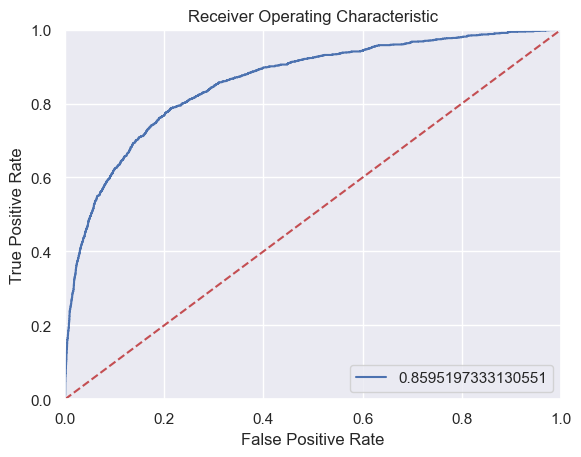

In [43]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [44]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr, tpr,z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)



0.7400907441118061
[0.         0.06409242 1.        ]
[0.         0.54427391 1.        ]


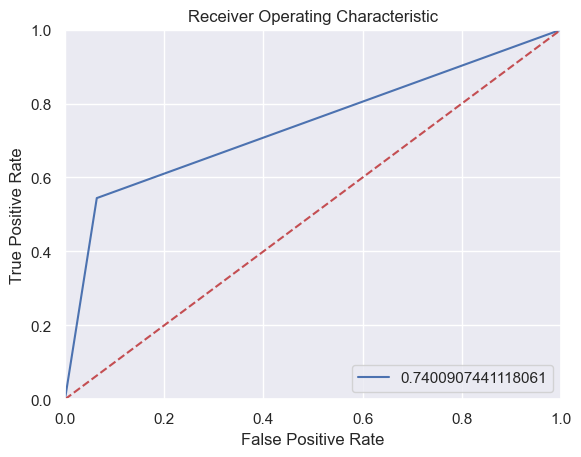

In [45]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

AUC:

Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.
AUC <= 0.5 worst
0.5 - 0.6 -> Poor
0.6 - 0.7 -> bad
0.7 - 0.8 -> good
0.8 - 0.9 -> V.good
0.9 - 1.0 -> Excellent
calculate AUC of at different Threshould level and compare AUC of main model and select the model which are close to main model AUC so this is how AUC can help you to select the best threshould for your model

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(y_test, y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[6070  249]
 [ 921  773]]

Classification report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6319
           1       0.76      0.46      0.57      1694

    accuracy                           0.85      8013
   macro avg       0.81      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013

Accuracy of the model:  0.8539872706851367


In [65]:
from sklearn.svm import SVC
# Logistic Regression

# train the model
svc = SVC()
svc.fit(X_train_scale,y_train)

# prediction on test data 
y_pred = svc.predict(X_test_scale)

# evalation 
print("Confusion Matri")
print(confusion_matrix(y_test, y_pred))
print("-----------------------------------------------")
print("Accuracy : ")
print(accuracy_score(y_test, y_pred))
print("-----------------------------------------------")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Confusion Matri
[[6070  249]
 [ 921  773]]
-----------------------------------------------
Accuracy : 
0.8539872706851367
-----------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6319
           1       0.76      0.46      0.57      1694

    accuracy                           0.85      8013
   macro avg       0.81      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



the recall for class 1 is highlighted, it reinforces the importance of the Recall Score. The confusion matrix shows that there are 921 false negatives (instances where the model predicted class 0 but the actual class was 1), which represents cases where the model failed to identify individuals who actually needed an H1N1 vaccine shot. Prioritizing recall in this context helps reduce the risk of missing out on such cases and ensures a more comprehensive identification of individuals requiring vaccination.




